<a href="https://colab.research.google.com/github/Akhy999/Machine-Learning-for-Financial-Analysis/blob/main/Stock_Price_Predictions_Using_regression_%26_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT
In this project, we will train a Ridge Regression model and an LSTM model to predict the future stock prices. Accurate prediction of stock prices can help investors in maximizing returns. Here we use the historical stock price data and corresponding transaction volume data to predict the future prices.

# IMPORTING DATASETS AND LIBRARIES


In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras


In [2]:
# Read stock prices data
stock_price_df = pd.read_csv('/content/stock.csv')
stock_price_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [3]:
# Read the stocks volume data
stock_vol_df = pd.read_csv("/content/stock_volume.csv")
stock_vol_df

Date      AAPL        BA         T       MGM     AMZN      IBM  \
0     2012-01-12  53146800   3934500  26511100  17891100  5385800  6881000   
1     2012-01-13  56505400   4641100  22096800  16621800  4753500  5279200   
2     2012-01-17  60724300   3700100  23500200  15480800  5644500  6003400   
3     2012-01-18  69197800   4189500  22015000  18387600  7473500  4600600   
4     2012-01-19  65434600   5397300  25524000  14022900  7096000  8567200   
...          ...       ...       ...       ...       ...      ...      ...   
2154  2020-08-05  30498000  46551000  22991700  18914200  3930000  3675400   
2155  2020-08-06  50607200  32921600  21908700  35867700  3940600  3417100   
2156  2020-08-07  49453300  19301600  30398500  34530300  3929600  3651000   
2157  2020-08-10  53100900  35857700  35514400  71219700  3167300  3968300   
2158  2020-08-11  46871100  60966900  30978300  34357900  3706600  4998500   

         TSLA      GOOG       sp500  
0      729300   3764400  4019890000  
1     5500400   4631800  3692370000  
2     4651600   3832800  4010490000  
3     1260200   5544000  4096160000  
4     1246300  12657800  4465890000  
...       ...       ...         ...  
2154  4978000   1979500  4732220000  
2155  5992300   1995400  4267490000  
2156  8883500   1576600  4104860000  
2157  7522300   1289300  4318570000  
2158  8356000   1452000  5087650000  

[2159 rows x 10 columns]

In [4]:
# Sort the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [5]:
# Sort the data based on Date
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

Date      AAPL        BA         T       MGM     AMZN      IBM  \
0     2012-01-12  53146800   3934500  26511100  17891100  5385800  6881000   
1     2012-01-13  56505400   4641100  22096800  16621800  4753500  5279200   
2     2012-01-17  60724300   3700100  23500200  15480800  5644500  6003400   
3     2012-01-18  69197800   4189500  22015000  18387600  7473500  4600600   
4     2012-01-19  65434600   5397300  25524000  14022900  7096000  8567200   
...          ...       ...       ...       ...       ...      ...      ...   
2154  2020-08-05  30498000  46551000  22991700  18914200  3930000  3675400   
2155  2020-08-06  50607200  32921600  21908700  35867700  3940600  3417100   
2156  2020-08-07  49453300  19301600  30398500  34530300  3929600  3651000   
2157  2020-08-10  53100900  35857700  35514400  71219700  3167300  3968300   
2158  2020-08-11  46871100  60966900  30978300  34357900  3706600  4998500   

         TSLA      GOOG       sp500  
0      729300   3764400  4019890000  
1     5500400   4631800  3692370000  
2     4651600   3832800  4010490000  
3     1260200   5544000  4096160000  
4     1246300  12657800  4465890000  
...       ...       ...         ...  
2154  4978000   1979500  4732220000  
2155  5992300   1995400  4267490000  
2156  8883500   1576600  4104860000  
2157  7522300   1289300  4318570000  
2158  8356000   1452000  5087650000  

[2159 rows x 10 columns]

In [6]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [7]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [8]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [9]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 168.8+ KB


In [10]:
# Describe Stock price data
stock_price_df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [11]:
# Describe Stock volume data
stock_vol_df.describe()

AAPL            BA             T           MGM          AMZN  \
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03   
mean   5.820332e+07  6.419916e+06  2.832131e+07  9.845582e+06  4.102673e+06   
std    4.568141e+07  9.711873e+06  1.428911e+07  7.295753e+06  2.290722e+06   
min    1.136200e+07  7.889000e+05  6.862400e+06  9.507000e+05  8.813000e+05   
25%    2.769930e+07  3.031850e+06  2.002150e+07  5.796450e+06  2.675700e+06   
50%    4.209420e+07  3.991000e+06  2.485930e+07  7.899800e+06  3.494800e+06   
75%    7.182480e+07  5.325900e+06  3.210565e+07  1.104055e+07  4.768150e+06   
max    3.765300e+08  1.032128e+08  1.950827e+08  9.009820e+07  2.385610e+07   

                IBM          TSLA          GOOG         sp500  
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  
mean   4.453090e+06  7.001302e+06  2.498238e+06  3.680732e+09  
std    2.462811e+06  5.781208e+06  1.928407e+06  8.622717e+08  
min    1.193000e+06  3.649000e+05  7.900000e+03  1.248960e+09  
25%    3.111250e+06  3.433450e+06  1.325400e+06  3.211890e+09  
50%    3.825000e+06  5.581100e+06  1.813900e+06  3.526890e+09  
75%    4.937300e+06  8.619550e+06  3.245350e+06  3.933290e+09  
max    3.049020e+07  6.093880e+07  2.497790e+07  9.044690e+09

# PERFORMING EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [12]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  df_normalized = df.copy()
  for i in df_normalized.columns[1:]:
    df_normalized[i] = df_normalized[i]/df_normalized[i][0]
  return df_normalized

In [13]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for col in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[col], name = col)
  fig.show()
  fig.write_html(title + '.html')

In [14]:
# plot interactive chart for stocks data
interactive_plot(stock_price_df, 'Stock Prices')

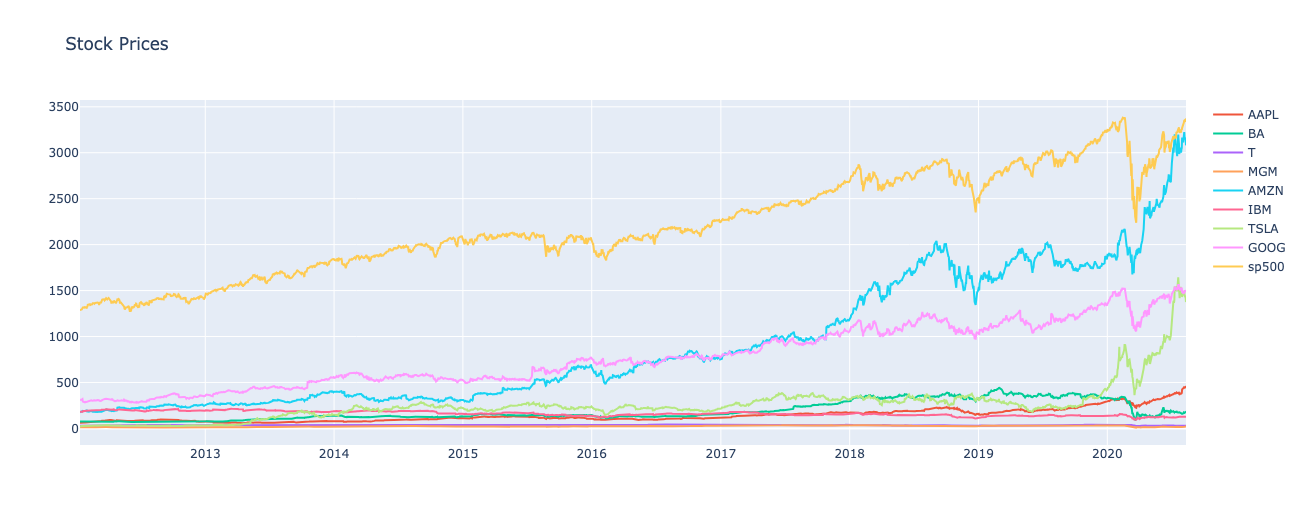

In [15]:
# Plot interactive chart for volume data
interactive_plot(stock_vol_df, 'Stocks Volume')

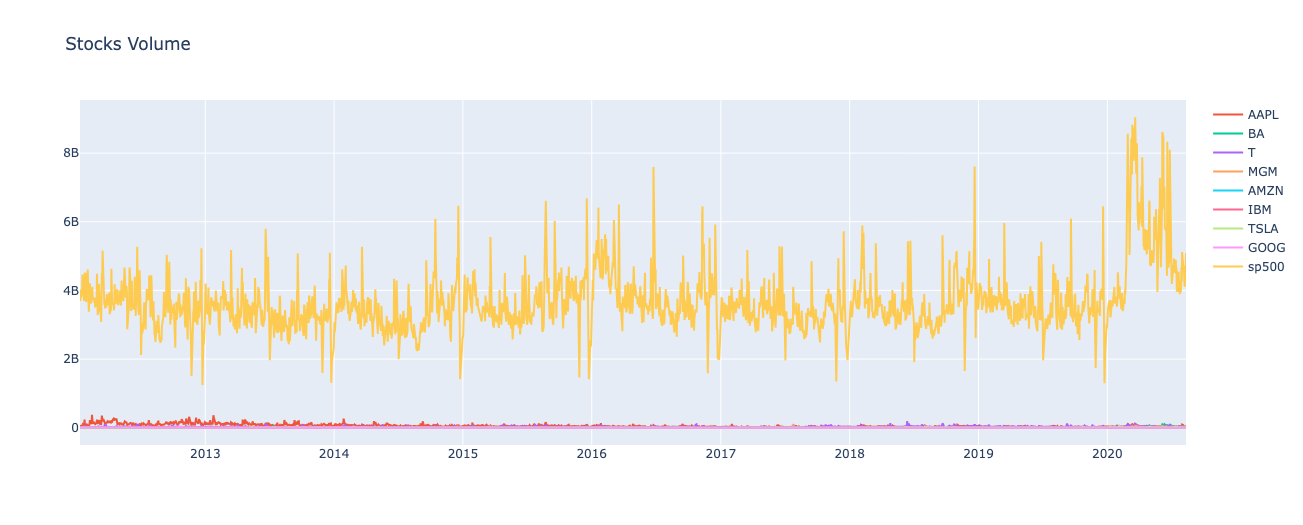

In [16]:
# Plot interactive chart for normalized stock data
interactive_plot(normalize(stock_price_df), 'Stock Prices')

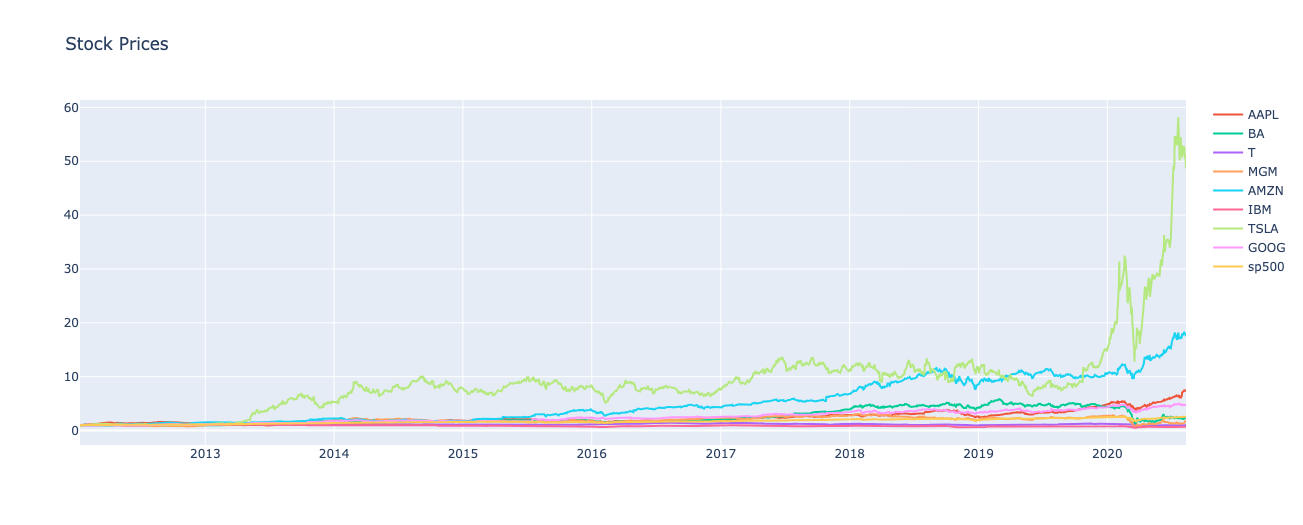

In [17]:
# Plot interactive chart for normalized volume data
interactive_plot(normalize(stock_vol_df), 'Stocks Volume')

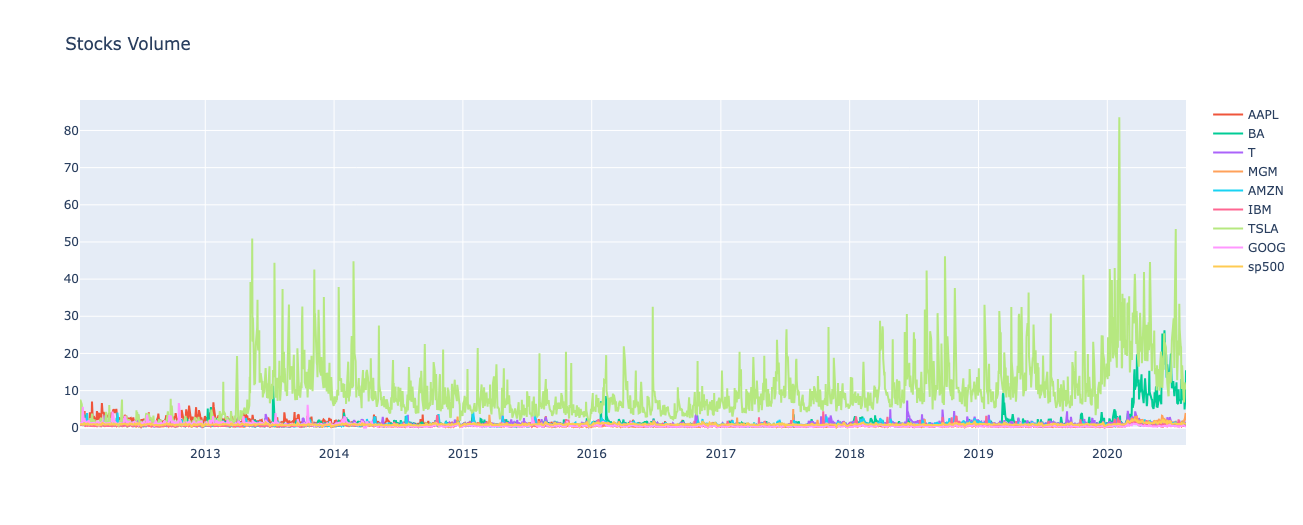

# PREPARING THE DATA BEFORE TRAINING THE ML MODEL

In [18]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [19]:
# Function to return the input/output (target) data for Model
# Target stock price today will be tomorrow's price
def trading_window(data):

  # 1 day window
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)

  # return the new dataset
  return data

In [20]:
# Get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

Date       Close    Volume
0     2012-01-12   60.198570  53146800
1     2012-01-13   59.972858  56505400
2     2012-01-17   60.671429  60724300
3     2012-01-18   61.301430  69197800
4     2012-01-19   61.107143  65434600
...          ...         ...       ...
2154  2020-08-05  440.250000  30498000
2155  2020-08-06  455.609985  50607200
2156  2020-08-07  444.450012  49453300
2157  2020-08-10  450.910004  53100900
2158  2020-08-11  437.500000  46871100

[2159 rows x 3 columns]

In [21]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

Date       Close    Volume      Target
0     2012-01-12   60.198570  53146800   59.972858
1     2012-01-13   59.972858  56505400   60.671429
2     2012-01-17   60.671429  60724300   61.301430
3     2012-01-18   61.301430  69197800   61.107143
4     2012-01-19   61.107143  65434600   60.042858
...          ...         ...       ...         ...
2154  2020-08-05  440.250000  30498000  455.609985
2155  2020-08-06  455.609985  50607200  444.450012
2156  2020-08-07  444.450012  49453300  450.910004
2157  2020-08-10  450.910004  53100900  437.500000
2158  2020-08-11  437.500000  46871100         NaN

[2159 rows x 4 columns]

In [22]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

Date       Close    Volume      Target
0     2012-01-12   60.198570  53146800   59.972858
1     2012-01-13   59.972858  56505400   60.671429
2     2012-01-17   60.671429  60724300   61.301430
3     2012-01-18   61.301430  69197800   61.107143
4     2012-01-19   61.107143  65434600   60.042858
...          ...         ...       ...         ...
2153  2020-08-04  438.660004  43267900  440.250000
2154  2020-08-05  440.250000  30498000  455.609985
2155  2020-08-06  455.609985  50607200  444.450012
2156  2020-08-07  444.450012  49453300  450.910004
2157  2020-08-10  450.910004  53100900  437.500000

[2158 rows x 4 columns]

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [24]:
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [25]:
price_volume_target_scaled_df.shape

(2158, 3)

In [26]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [27]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((2158, 2), (2158, 1))

In [28]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [29]:
X_train.shape, y_train.shape

((1402, 2), (1402, 1))

In [30]:
X_test.shape, y_test.shape

((756, 2), (756, 1))

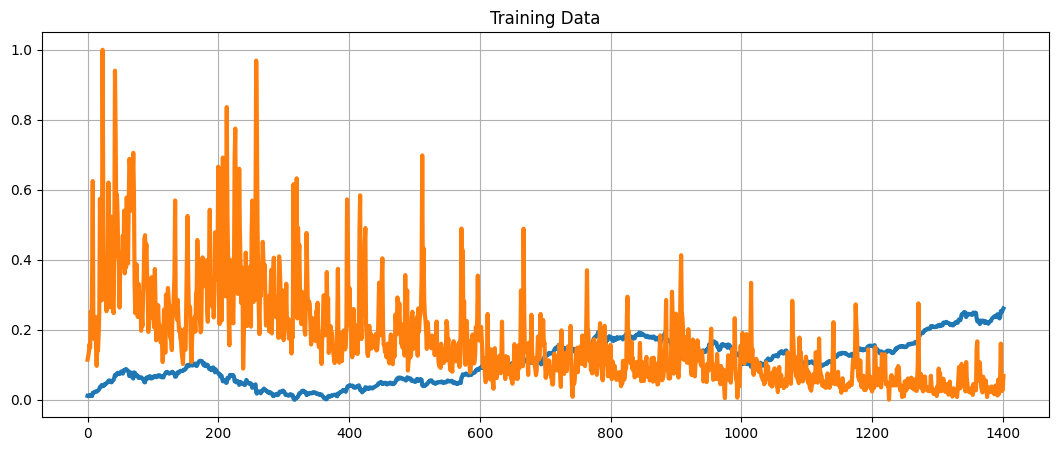

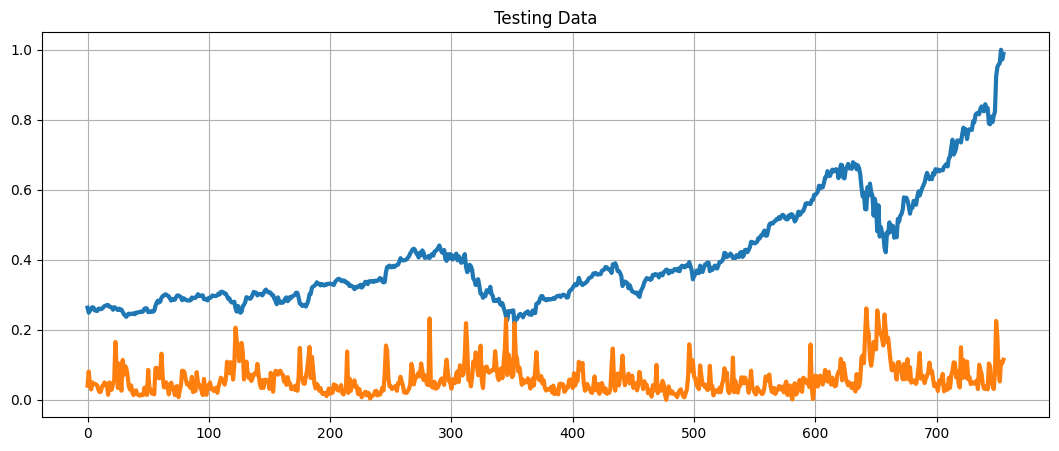

In [31]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


# BUILDING AND TRAINING A RIDGE LINEAR REGRESSION MODEL

In [32]:
from sklearn.linear_model import Ridge
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [33]:
# Test the model and calculate its R2 Score
lr_score = regression_model.score(X_test, y_test)
print("Linear Regression R2 Score: ", lr_score)

Linear Regression R2 Score:  0.7950028030821767


In [34]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.03466412],
       [0.03374627],
       [0.03451936],
       ...,
       [0.81048342],
       [0.78876033],
       [0.80091324]])

In [35]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [36]:
len(Predicted)

2158

In [37]:
# Append the target values to the list
target = []
for i in price_volume_target_scaled_df:
  target.append(i[2])


In [38]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

Date
0     2012-01-12
1     2012-01-13
2     2012-01-17
3     2012-01-18
4     2012-01-19
...          ...
2153  2020-08-04
2154  2020-08-05
2155  2020-08-06
2156  2020-08-07
2157  2020-08-10

[2158 rows x 1 columns]

In [39]:
# Add the target values to the dataframe
df_predicted['Target'] = target
df_predicted

Date    Target
0     2012-01-12  0.010462
1     2012-01-13  0.012209
2     2012-01-17  0.013785
3     2012-01-18  0.013299
4     2012-01-19  0.010637
...          ...       ...
2153  2020-08-04  0.961583
2154  2020-08-05  1.000000
2155  2020-08-06  0.972088
2156  2020-08-07  0.988245
2157  2020-08-10  0.954705

[2158 rows x 2 columns]

In [40]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

Date    Target  Prediction
0     2012-01-12  0.010462    0.034664
1     2012-01-13  0.012209    0.033746
2     2012-01-17  0.013785    0.034519
3     2012-01-18  0.013299    0.034556
4     2012-01-19  0.010637    0.034707
...          ...       ...         ...
2153  2020-08-04  0.961583    0.778280
2154  2020-08-05  1.000000    0.783205
2155  2020-08-06  0.972088    0.810483
2156  2020-08-07  0.988245    0.788760
2157  2020-08-10  0.954705    0.800913

[2158 rows x 3 columns]

In [41]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

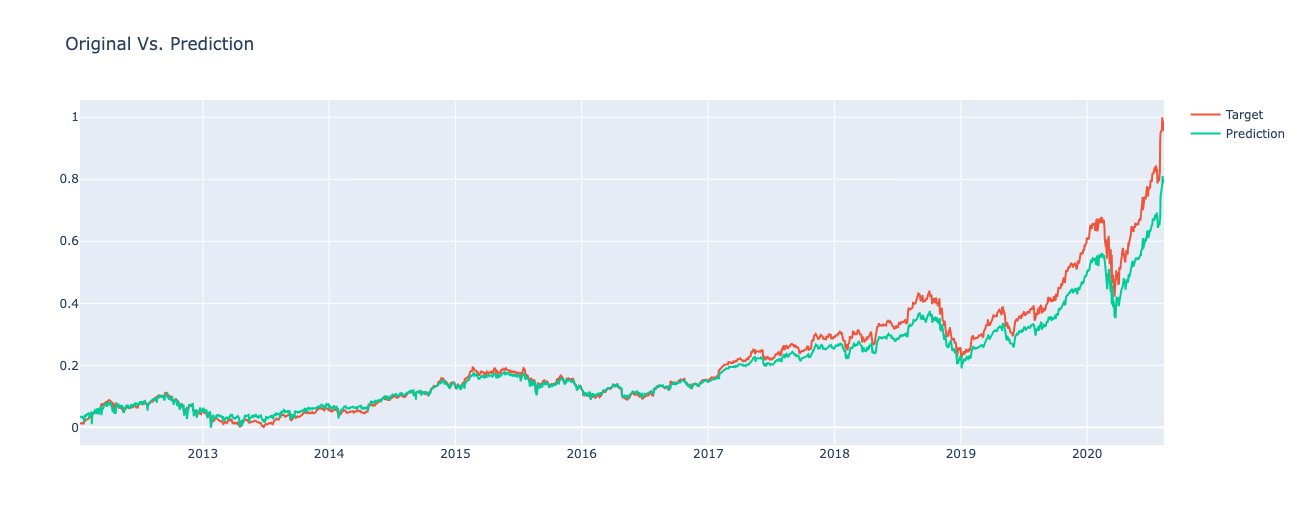

# TRAINING AN LSTM TIME SERIES MODEL

In [42]:
# Get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

Date       Close    Volume
0     2012-01-12   60.198570  53146800
1     2012-01-13   59.972858  56505400
2     2012-01-17   60.671429  60724300
3     2012-01-18   61.301430  69197800
4     2012-01-19   61.107143  65434600
...          ...         ...       ...
2154  2020-08-05  440.250000  30498000
2155  2020-08-06  455.609985  50607200
2156  2020-08-07  444.450012  49453300
2157  2020-08-10  450.910004  53100900
2158  2020-08-11  437.500000  46871100

[2159 rows x 3 columns]

In [43]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[6.01985700e+01, 5.31468000e+07],
       [5.99728580e+01, 5.65054000e+07],
       [6.06714290e+01, 6.07243000e+07],
       ...,
       [4.44450012e+02, 4.94533000e+07],
       [4.50910004e+02, 5.31009000e+07],
       [4.37500000e+02, 4.68711000e+07]])

In [44]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [45]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [46]:
X

[array([0.01102638]),
 array([0.01046185]),
 array([0.01220906]),
 array([0.01378478]),
 array([0.01329884]),
 array([0.01063693]),
 array([0.01317736]),
 array([0.01067623]),
 array([0.02005545]),
 array([0.01933012]),
 array([0.02027698]),
 array([0.02232433]),
 array([0.02356417]),
 array([0.02346055]),
 array([0.02307824]),
 array([0.02470754]),
 array([0.02624037]),
 array([0.02797688]),
 array([0.03078171]),
 array([0.03667365]),
 array([0.03676297]),
 array([0.04004303]),
 array([0.04249412]),
 array([0.0382815]),
 array([0.03990367]),
 array([0.03987152]),
 array([0.04442]),
 array([0.04377327]),
 array([0.04497023]),
 array([0.0471212]),
 array([0.04831818]),
 array([0.05176615]),
 array([0.054278]),
 array([0.05500331]),
 array([0.05525701]),
 array([0.05096223]),
 array([0.04992603]),
 array([0.05007968]),
 array([0.0541172]),
 array([0.05525344]),
 array([0.05769381]),
 array([0.06344641]),
 array([0.07112129]),
 array([0.06968493]),
 array([0.0696885]),
 array([0.07523743]

In [47]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [48]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [49]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [50]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [51]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
38/38 [==============================] - 17s 59ms/step - loss: 0.0037 - val_loss: 0.0193
Epoch 2/20
38/38 [==============================] - 1s 17ms/step - loss: 0.0018 - val_loss: 0.0043
Epoch 3/20
38/38 [==============================] - 1s 29ms/step - loss: 2.4353e-04 - val_loss: 2.5198e-05
Epoch 4/20
38/38 [==============================] - 2s 51ms/step - loss: 5.6985e-05 - val_loss: 3.7945e-05
Epoch 5/20
38/38 [==============================] - 2s 61ms/step - loss: 4.8999e-05 - val_loss: 2.0443e-05
Epoch 6/20
38/38 [==============================] - 2s 60ms/step - loss: 4.7807e-05 - val_loss: 4.6926e-05
Epoch 7/20
38/38 [==============================] - 2s 49ms/step - loss: 4.2135e-05 - val_loss: 1.6945e-05
Epoch 8/20
38/38 [==============================] - 2s 48ms/step - loss: 5.0138e-05 - val_loss: 1.9114e-05
Epoch 9/20
38/38 [==============================] - 2s 42ms/step - loss: 3.7397e-05 - val_loss: 1.7803e-05
Epoch 10/20
38/38 [==============================] -

In [52]:
# Make prediction
predicted = model.predict(X)
predicted

68/68 [==============================] - 2s 6ms/step


array([[0.01308247],
       [0.01253631],
       [0.01422673],
       ...,
       [0.95105714],
       [0.9263407 ],
       [0.94066805]], dtype=float32)

In [53]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [54]:
test_predicted

[0.013082473,
 0.012536312,
 0.014226729,
 0.015751382,
 0.0152811725,
 0.012705688,
 0.015163626,
 0.012743707,
 0.021820396,
 0.021118272,
 0.022034852,
 0.024016906,
 0.025217323,
 0.025116999,
 0.024746835,
 0.026324432,
 0.027808752,
 0.02949048,
 0.0322072,
 0.037915498,
 0.03800205,
 0.04118073,
 0.043556448,
 0.039473575,
 0.04104567,
 0.041014507,
 0.04542333,
 0.04479639,
 0.045956742,
 0.048042115,
 0.049202695,
 0.05254623,
 0.054982383,
 0.055685904,
 0.055931974,
 0.051766604,
 0.050761774,
 0.05091077,
 0.054826416,
 0.055928513,
 0.058295757,
 0.06387712,
 0.07132597,
 0.06993171,
 0.069935165,
 0.07532197,
 0.07700801,
 0.07580764,
 0.07471142,
 0.073570155,
 0.077361874,
 0.079964094,
 0.081053644,
 0.078361094,
 0.07478428,
 0.081404105,
 0.08511386,
 0.083375156,
 0.08662707,
 0.08751214,
 0.084808454,
 0.084031075,
 0.08284074,
 0.076754734,
 0.06804855,
 0.07830558,
 0.07783373,
 0.07058372,
 0.06556916,
 0.06512533,
 0.06116598,
 0.07840967,
 0.07761167,
 0.07598

In [55]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

Date
1     2012-01-13
2     2012-01-17
3     2012-01-18
4     2012-01-19
5     2012-01-20
...          ...
2154  2020-08-05
2155  2020-08-06
2156  2020-08-07
2157  2020-08-10
2158  2020-08-11

[2158 rows x 1 columns]

In [56]:
df_predicted['predictions'] = test_predicted

In [57]:
df_predicted

Date  predictions
1     2012-01-13     0.013082
2     2012-01-17     0.012536
3     2012-01-18     0.014227
4     2012-01-19     0.015751
5     2012-01-20     0.015281
...          ...          ...
2154  2020-08-05     0.913453
2155  2020-08-06     0.916997
2156  2020-08-07     0.951057
2157  2020-08-10     0.926341
2158  2020-08-11     0.940668

[2158 rows x 2 columns]

In [58]:
df_predicted['Target'] = y

In [59]:
df_predicted

Date  predictions    Target
1     2012-01-13     0.013082  0.010462
2     2012-01-17     0.012536  0.012209
3     2012-01-18     0.014227  0.013785
4     2012-01-19     0.015751  0.013299
5     2012-01-20     0.015281  0.010637
...          ...          ...       ...
2154  2020-08-05     0.913453  0.961583
2155  2020-08-06     0.916997  1.000000
2156  2020-08-07     0.951057  0.972088
2157  2020-08-10     0.926341  0.988245
2158  2020-08-11     0.940668  0.954705

[2158 rows x 3 columns]

In [60]:
y_preds = model.predict(X_test.reshape(-1,1))

21/21 [==============================] - 0s 6ms/step


In [61]:
# Calculate its R2 Score
from sklearn.metrics import r2_score
lstm_score = r2_score(y_test, y_preds)
print("LSTM R2 Score: ", lstm_score)

LSTM R2 Score:  0.984141336911636


In [62]:
# Plot the data (train + test)
interactive_plot(df_predicted, "Original Vs Prediction")

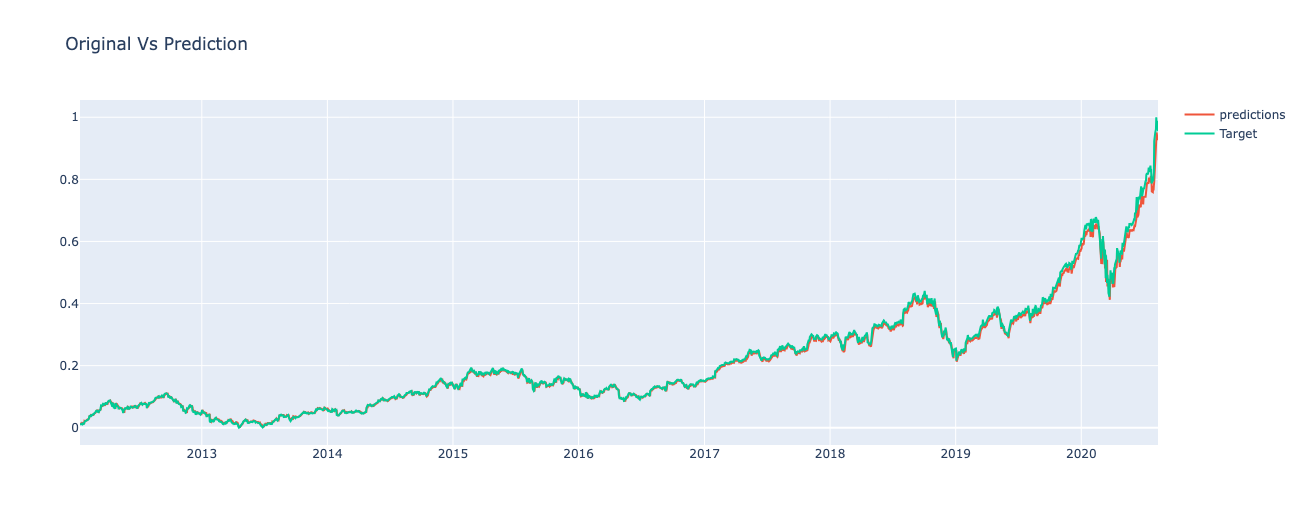